### IMPORTING THE NECESSARY LIBRARIES 

1. DATA PROCESSING, ANALYSIS AND VISUALISATION

In [331]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pastel_palette = sns.color_palette("pastel")
sns.set_theme(style='darkgrid')

2. NLP PRE PROCESSING 

In [332]:
# Data pre-processing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lalitaneeharikavajjhala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lalitaneeharikavajjhala/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lalitaneeharikavajjhala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

3. MACHINE LEARNING MODELS 

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss

4. SAVING THE MODELS 

In [334]:
import joblib

5. PANDAS PROFILING

In [335]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [336]:
'''
# Pandas profiling
import pandas_profiling
from pandas_profiling import ProfileReport
'''


'\n# Pandas profiling\nimport pandas_profiling\nfrom pandas_profiling import ProfileReport\n'

6.  WORD CLOUD VISUALIZATION

In [337]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [338]:
# Word cloud visualisation
from wordcloud import WordCloud

### WORKING ON THE DATASET 

In [339]:
# Loading the dataset into a pandas dataframe
file_path = "/Users/lalitaneeharikavajjhala/Desktop/Research credits /Data/norm_dataset.csv"
df = pd.read_csv(file_path)

In [340]:
# Previewing first 5 rows of dataset. 
pd.set_option('display.max_colwidth', None) #Extending the max column width in order to preview the entire sentence of the olumn
df.head()

,text,norm
0,"Client agrees to pay to Company the sum of $5,000 (the “Contract Price”) to design and develop a website for Client (the “Client Website”) in accordance with the accompanying Scope of Work, attached to this Agreement as Exhibit A.",1
1,Company will use its best efforts to deliver the Client Website in the time frame specified in the Scope of Work.,1
2,"All written content submitted by Client for use in the Client Website must be typewritten, proofread and delivered to Company in the body of an email message or as a Microsoft Word electronic document or plaint text electronic document.",1
3,It is Client’s sole responsibility to check the accuracy of the written content and correct any errors prior to submission for final publication.,1
4,Client further agrees that Company may use and display the graphics and other web design elements of Client’s website as examples of Company website design and development work.,1


In [341]:
# Shape of the dataframe 
row_count, column_count = df.shape
df.shape

(366, 2)

In [342]:
# Checking the data types
df.dtypes

text    object
norm     int64
dtype: object

In [343]:
# Checking for null values
df.isnull().sum()

text    0
norm    0
dtype: int64

In [344]:
# Checking if there are any duplicate records
df[df.duplicated(keep=False)]

,text,norm
2,"All written content submitted by Client for use in the Client Website must be typewritten, proofread and delivered to Company in the body of an email message or as a Microsoft Word electronic document or plaint text electronic document.",1
48,"If the adjustment is more than $1,500 in favor, then out-of-pocket costs of such examination shall be borne by Zynga.",1
51,"EXCEPT IN CASES OF GROSS NEGLIGENCE, WILLFUL MISCONDUCT OR FRAUD, INDEMNIFICATION CLAIMS UNDER SECTION 5 OR BREACHES OF SECTION 2 (TRADEMARKS), 8 (CONFIDENTIALITY), OR 9 (NO AGENCY RELATIONSHIP), IN NO EVENT SHALL EITHER PARTY OR ITS OFFICERS, DIRECTORS, OR EMPLOYEES BE LIABLE TO THE OTHER PARTY IN CONNECTION WITH THE SUBJECT MATTER HEREOF, FOR ANY SPECIAL, INDIRECT, CONSEQUENTIAL OR PUNITIVE DAMAGES OF ANY KIND, LOST PROFITS OR LOST REVENUE, WHETHER ARISING IN CONTRACT, TORT, NEGLIGENCE, STATUTE, OR OTHERWISE, EVEN IF ADVISED OF THE POSSIBILITY THEREOF.",1
52,IN NO EVENT SHALL THE NON-BREACHING PARTY BE ENTITLED TO EQUITABLE OR INJUNCTIVE RELIEF OF ANY KIND.,1
60,"Notwithstanding the foregoing, for each end user that previously downloaded a Zynga game that includes WPT’s Licensed Property, and stored such Zynga game within such end user’s device, WPT grants a license and right to continue to use, activate, operate, perform, store, use and display that game on the end user’s device in perpetuity at no additional charge; provided, however, that Zynga shall use best efforts to offer end users updates to its games which no longer include WPT’s Licensed Property after the Term.",1
62,Each party agrees to carry liability insurance sufficient to cover the risks posed under this Agreement.,1
307,"All written content submitted by Client for use in the Client Website must be typewritten, proofread and delivered to Company in the body of an email message or as a Microsoft Word electronic document or plaint text electronic document.",1
308,"If the adjustment is more than $1,500 in favor, then out-of-pocket costs of such examination shall be borne by Zynga.",1
309,"EXCEPT IN CASES OF GROSS NEGLIGENCE, WILLFUL MISCONDUCT OR FRAUD, INDEMNIFICATION CLAIMS UNDER SECTION 5 OR BREACHES OF SECTION 2 (TRADEMARKS), 8 (CONFIDENTIALITY), OR 9 (NO AGENCY RELATIONSHIP), IN NO EVENT SHALL EITHER PARTY OR ITS OFFICERS, DIRECTORS, OR EMPLOYEES BE LIABLE TO THE OTHER PARTY IN CONNECTION WITH THE SUBJECT MATTER HEREOF, FOR ANY SPECIAL, INDIRECT, CONSEQUENTIAL OR PUNITIVE DAMAGES OF ANY KIND, LOST PROFITS OR LOST REVENUE, WHETHER ARISING IN CONTRACT, TORT, NEGLIGENCE, STATUTE, OR OTHERWISE, EVEN IF ADVISED OF THE POSSIBILITY THEREOF.",1
310,IN NO EVENT SHALL THE NON-BREACHING PARTY BE ENTITLED TO EQUITABLE OR INJUNCTIVE RELIEF OF ANY KIND.,1


In [345]:
# Remove\ing the duplicates and checking new shape of dataframe 
df.drop_duplicates(keep='first', inplace=True)
df.shape

(360, 2)

In [346]:
#  Checking once again for duplicates
df[df.duplicated(keep=False)]

,text,norm


In [347]:
# Exploring the target column by checking the unique values
df['norm'].unique()

array([1, 0])

In [348]:
# Since there are only two classes, it is a binary problem
df['norm'].value_counts()

norm
0    183
1    177
Name: count, dtype: int64

### DATA VISUALIZATION

1. VISUALIZING THE CLASS DISTRIBUTION 

/var/folders/lm/8dmqs1pd6qg4vn2y7m90m3pw0000gn/T/ipykernel_8171/2639050752.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='norm', data=df, palette=pastel_palette)
/var/folders/lm/8dmqs1pd6qg4vn2y7m90m3pw0000gn/T/ipykernel_8171/2639050752.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x='norm', data=df, palette=pastel_palette)
/var/folders/lm/8dmqs1pd6qg4vn2y7m90m3pw0000gn/T/ipykernel_8171/2639050752.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels())
/var/folders/lm/8dmqs1pd6qg4vn2y7m90m3pw0000gn/T/ipykernel_8171/2639050752.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

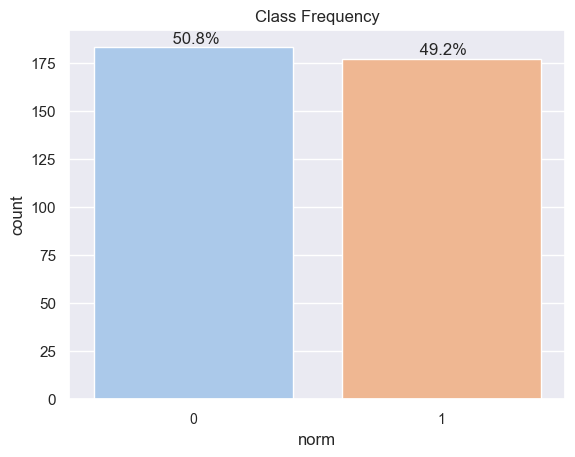

In [349]:
ax = sns.countplot(x='norm', data=df, palette=pastel_palette)
plt.xticks(size=10)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title("Class Frequency")

# Adding % to bars in graph
total = len(df)
for p in ax.patches:
    percent = f'{100*p.get_height() / total: .1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percent, (x, y), ha='center', va='center')
plt.show()

In [350]:
# Checking the word count of sentences in the columns
df['word_count'] = df['text'].str.findall(r'(\w+)').str.len()
df.head()

,text,norm,word_count
0,"Client agrees to pay to Company the sum of $5,000 (the “Contract Price”) to design and develop a website for Client (the “Client Website”) in accordance with the accompanying Scope of Work, attached to this Agreement as Exhibit A.",1,40
1,Company will use its best efforts to deliver the Client Website in the time frame specified in the Scope of Work.,1,21
2,"All written content submitted by Client for use in the Client Website must be typewritten, proofread and delivered to Company in the body of an email message or as a Microsoft Word electronic document or plaint text electronic document.",1,39
3,It is Client’s sole responsibility to check the accuracy of the written content and correct any errors prior to submission for final publication.,1,24
4,Client further agrees that Company may use and display the graphics and other web design elements of Client’s website as examples of Company website design and development work.,1,29


In [351]:
# Checking the statictics summary for word count
df.agg({
    'word_count': ['min', 'max','mean', 'median', 'skew']
})

,word_count
min,7.000000
max,555.000000
mean,43.619444
median,36.000000
skew,7.368855


2. VISUALIZING THE WORD COUNT SPREAD 

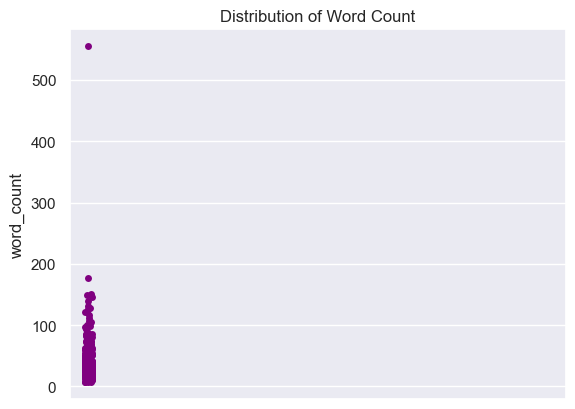

In [352]:
fig, ax = plt.subplots()
plt.title("Distribution of Word Count")
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])
sns.stripplot(df['word_count'], ax=ax, color = 'Purple')
plt.show()

In [353]:
'''
# Pandas profiling
profile = ProfileReport(df, title='Pandas Profiling Report')
profile
'''

"\n# Pandas profiling\nprofile = ProfileReport(df, title='Pandas Profiling Report')\nprofile\n"

3. TOKENISATION 

In [354]:
# Tokenisation 
comment_words = ' '

for val in df.text:
        bag = [ ]
        tokens = word_tokenize(val)
        tokens = [token.lower() for token in tokens if token.isalpha()]
        pos_tags = nltk.pos_tag(tokens)

        # Include modal verbs and other verb types
        select_pos = ['MD', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
        for word, tag in pos_tags:
            if tag in select_pos:
                bag.append((word))

        for i in range(len(bag)):
            bag[i] = bag[i].lower()
        comment_words += " ".join(bag)+" "
# Basically this code extracts verbs and their variants from the text data and stores them in a single string 'comment_words'


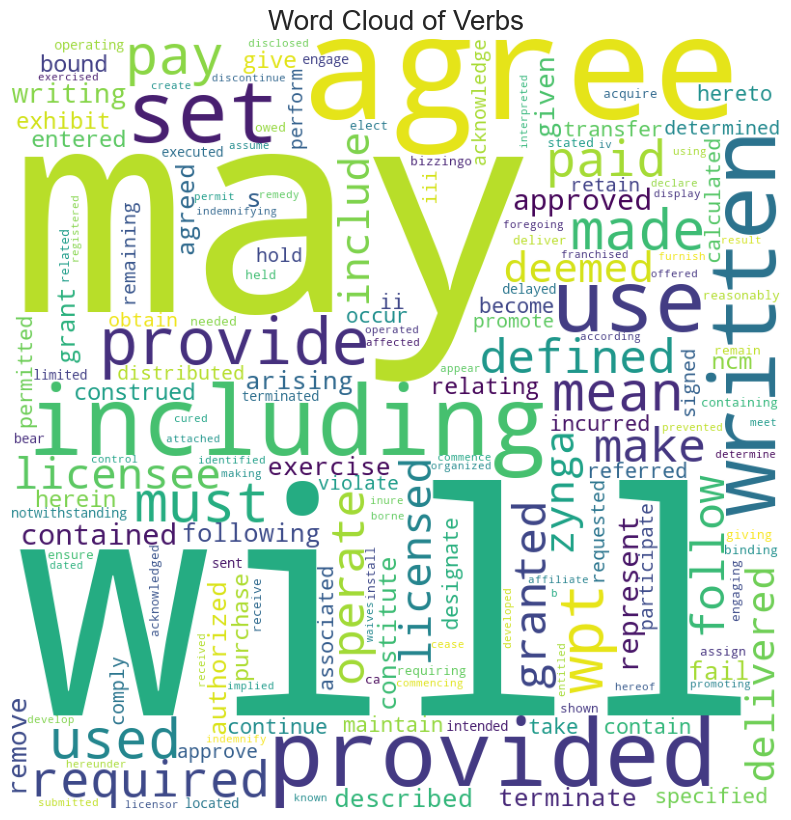

In [355]:

# Create word cloud
word_cloud = WordCloud(
                    width = 800, height = 800,
                    background_color='white',
                    min_font_size = 10
                    ).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Word Cloud of Verbs", fontsize=20)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)


### PRE PROCESSING USING NLTK

1. LEMMATIZATION

In [356]:
wnl = WordNetLemmatizer()

# Creating function to clean text
def clean_text(sentence):
     a = []
     
     # Splitting sentence into tokens
     tokens = word_tokenize(sentence)

     # Removing tokens that are not alphabetic (e.g. standalone punctuation)
     tokens = [token.lower() for token in tokens if token.isalpha()]

     # Reducing each word to its lemma
     for token in tokens:
          lem_word = wnl.lemmatize(token)
          a.append(lem_word)
     
     sentence = " ".join(a)
     return sentence

# Applying function to dataframe
df['clean_text'] = df['text'].apply(clean_text)
# Overall, this code preprocesses text data by tokenizing each sentence, filtering out non-alphabetic tokens, and lemmatizing the remaining words to their base forms. The resulting cleaned text is stored in a new column 'clean_text' in the DataFrame

In [357]:
df.head(5)

,text,norm,word_count,clean_text
0,"Client agrees to pay to Company the sum of $5,000 (the “Contract Price”) to design and develop a website for Client (the “Client Website”) in accordance with the accompanying Scope of Work, attached to this Agreement as Exhibit A.",1,40,client agrees to pay to company the sum of the contract price to design and develop a website for client the client website in accordance with the accompanying scope of work attached to this agreement a exhibit a
1,Company will use its best efforts to deliver the Client Website in the time frame specified in the Scope of Work.,1,21,company will use it best effort to deliver the client website in the time frame specified in the scope of work
2,"All written content submitted by Client for use in the Client Website must be typewritten, proofread and delivered to Company in the body of an email message or as a Microsoft Word electronic document or plaint text electronic document.",1,39,all written content submitted by client for use in the client website must be typewritten proofread and delivered to company in the body of an email message or a a microsoft word electronic document or plaint text electronic document
3,It is Client’s sole responsibility to check the accuracy of the written content and correct any errors prior to submission for final publication.,1,24,it is client s sole responsibility to check the accuracy of the written content and correct any error prior to submission for final publication
4,Client further agrees that Company may use and display the graphics and other web design elements of Client’s website as examples of Company website design and development work.,1,29,client further agrees that company may use and display the graphic and other web design element of client s website a example of company website design and development work


In [358]:
# Assigning target to a variable 'y'
y = df['norm']

# Vectorizing text/features (y already in binary form)
tfidf = TfidfVectorizer(analyzer='word', max_features=2000, ngram_range=(1,3)) 
X = tfidf.fit_transform(df['clean_text'])
X
# Basically, this code transforms the textual data into a numerical format by converting them into TF-IDF features
# The target variable y is also prepared

<360x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 16353 stored elements in Compressed Sparse Row format>

In [359]:
# Shape of features and target
X.shape, y.shape 

((360, 2000), (360,))

In [360]:
# Since the data is a bit uniformed (chunks of 1s followed by chunks of 0s) 
#  Hence shuffling the data
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
# This code is shuffling the rows of the DataFrame df to introduce randomness into the order of the data

In [361]:
# Splitting the data into training and testing sets. Shuffling data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

### MODEL BUILDING

In [362]:
# Instantiating the models
sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs') #The solver='lbfgs' parameter specifies the optimization algorithm to use. In this case, it's using the Limited-memory Broyden–Fletcher–Goldfarb–Shanno (L-BFGS) algorithm
svc = LinearSVC()

In [363]:
# Function to calculate and print evaluation metrics

def print_scores(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Accuracy: {:.2}".format(accuracy_score(y_test, y_pred)))
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print("-----------------------------------------------------------")

In [364]:
# Training the models
for classifier in [sgd, lr, svc]:
    clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_scores(y_pred, classifier)

Clf:  SGDClassifier
Accuracy: 0.9
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.91      0.89      0.90        35

    accuracy                           0.90        72
   macro avg       0.90      0.90      0.90        72
weighted avg       0.90      0.90      0.90        72

-----------------------------------------------------------
Clf:  LogisticRegression
Accuracy: 0.82
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        37
           1       0.84      0.77      0.81        35

    accuracy                           0.82        72
   macro avg       0.82      0.82      0.82        72
weighted avg       0.82      0.82      0.82        72

-----------------------------------------------------------
Clf:  LinearSVC
Accuracy: 0.88
Classification Report: 
               precision    recall  f1-score   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [365]:
# Making predictions

# x = ['Arizona may sublicense the licenses granted herein to its Affiliates and Third Parties in the ordinary course of business in support of its and its Affiliates’ business, but not for the independent use of Third Parties, and the Company may sublicense the licenses granted herein to Third Parties, its Subsidiaries, AWP, controlled Affiliates, or any holding company that is a direct or indirect parent of the Company in the ordinary course of business in support of its and its Subsidiaries’ or controlled Affiliates’ business, but not for the independent use of Third Parties (each such Affiliate, Third Party, AWP or Subsidiary, a “Sublicensee”)']
x = ['In this Agreement, “we,” “us” and “our” refers to Pizza Fusion Holding, Inc., the franchisor. ']
# x = ['This Agreement may be signed in counterparts and shall be deemed one original instrument.']
# x = ['XIMAGE agrees to respond to any telephone call made, within 30 minutes.']
xt = tfidf.transform(x)
print(clf.predict(xt))
# 0 indicates non norm and 1 indicates norm 

# this code takes new text data, transforms it into TF-IDF features (ie numerical values), and then uses a trained classifier to predict whether each piece of text corresponds to a norm (1) or non-norm (0). Finally, it prints the predicted labels.

[0]


### SAVING THE MODEL

In [366]:
# Saving the vectorizer
# joblib.dump(tfidf, "/Users/lalitaneeharikavajjhala/Desktop/Research credits /Models/BinaryLabelVectorizer.pkl")

In [367]:
# Saving the model 
# joblib.dump(clf, "/Users/lalitaneeharikavajjhala/Desktop/Research credits /ModelsBinaryLabelModel_NonNN.pkl")